In [1]:
!nvidia-smi

Sat Oct 18 20:17:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
%pip install ultralytics roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 109.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="AIindAUl9O2q2uL2G4Sg")
project = rf.workspace("hermes-eaduu").project("tcc-j7on9")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to tcc-1 in yolov8:: 100%|██████████| 7486/7486 [00:04<00:00, 1724.60it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

results = model.train(
    data="/content/tcc-1/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    name="yolov8n_person_detection",
)

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/tcc-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_person_detection, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2553.8±1557.9 MB/s, size: 372.5 KB)
val: Scanning /content/tcc-1/valid/labels.cache... 526 images, 4 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 526/526 815.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 33/33 4.5it/s 7.3s
                   all        526       1678      0.891      0.773      0.857      0.567
Speed: 0.9ms preprocess, 4.4ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f853069de80>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precis

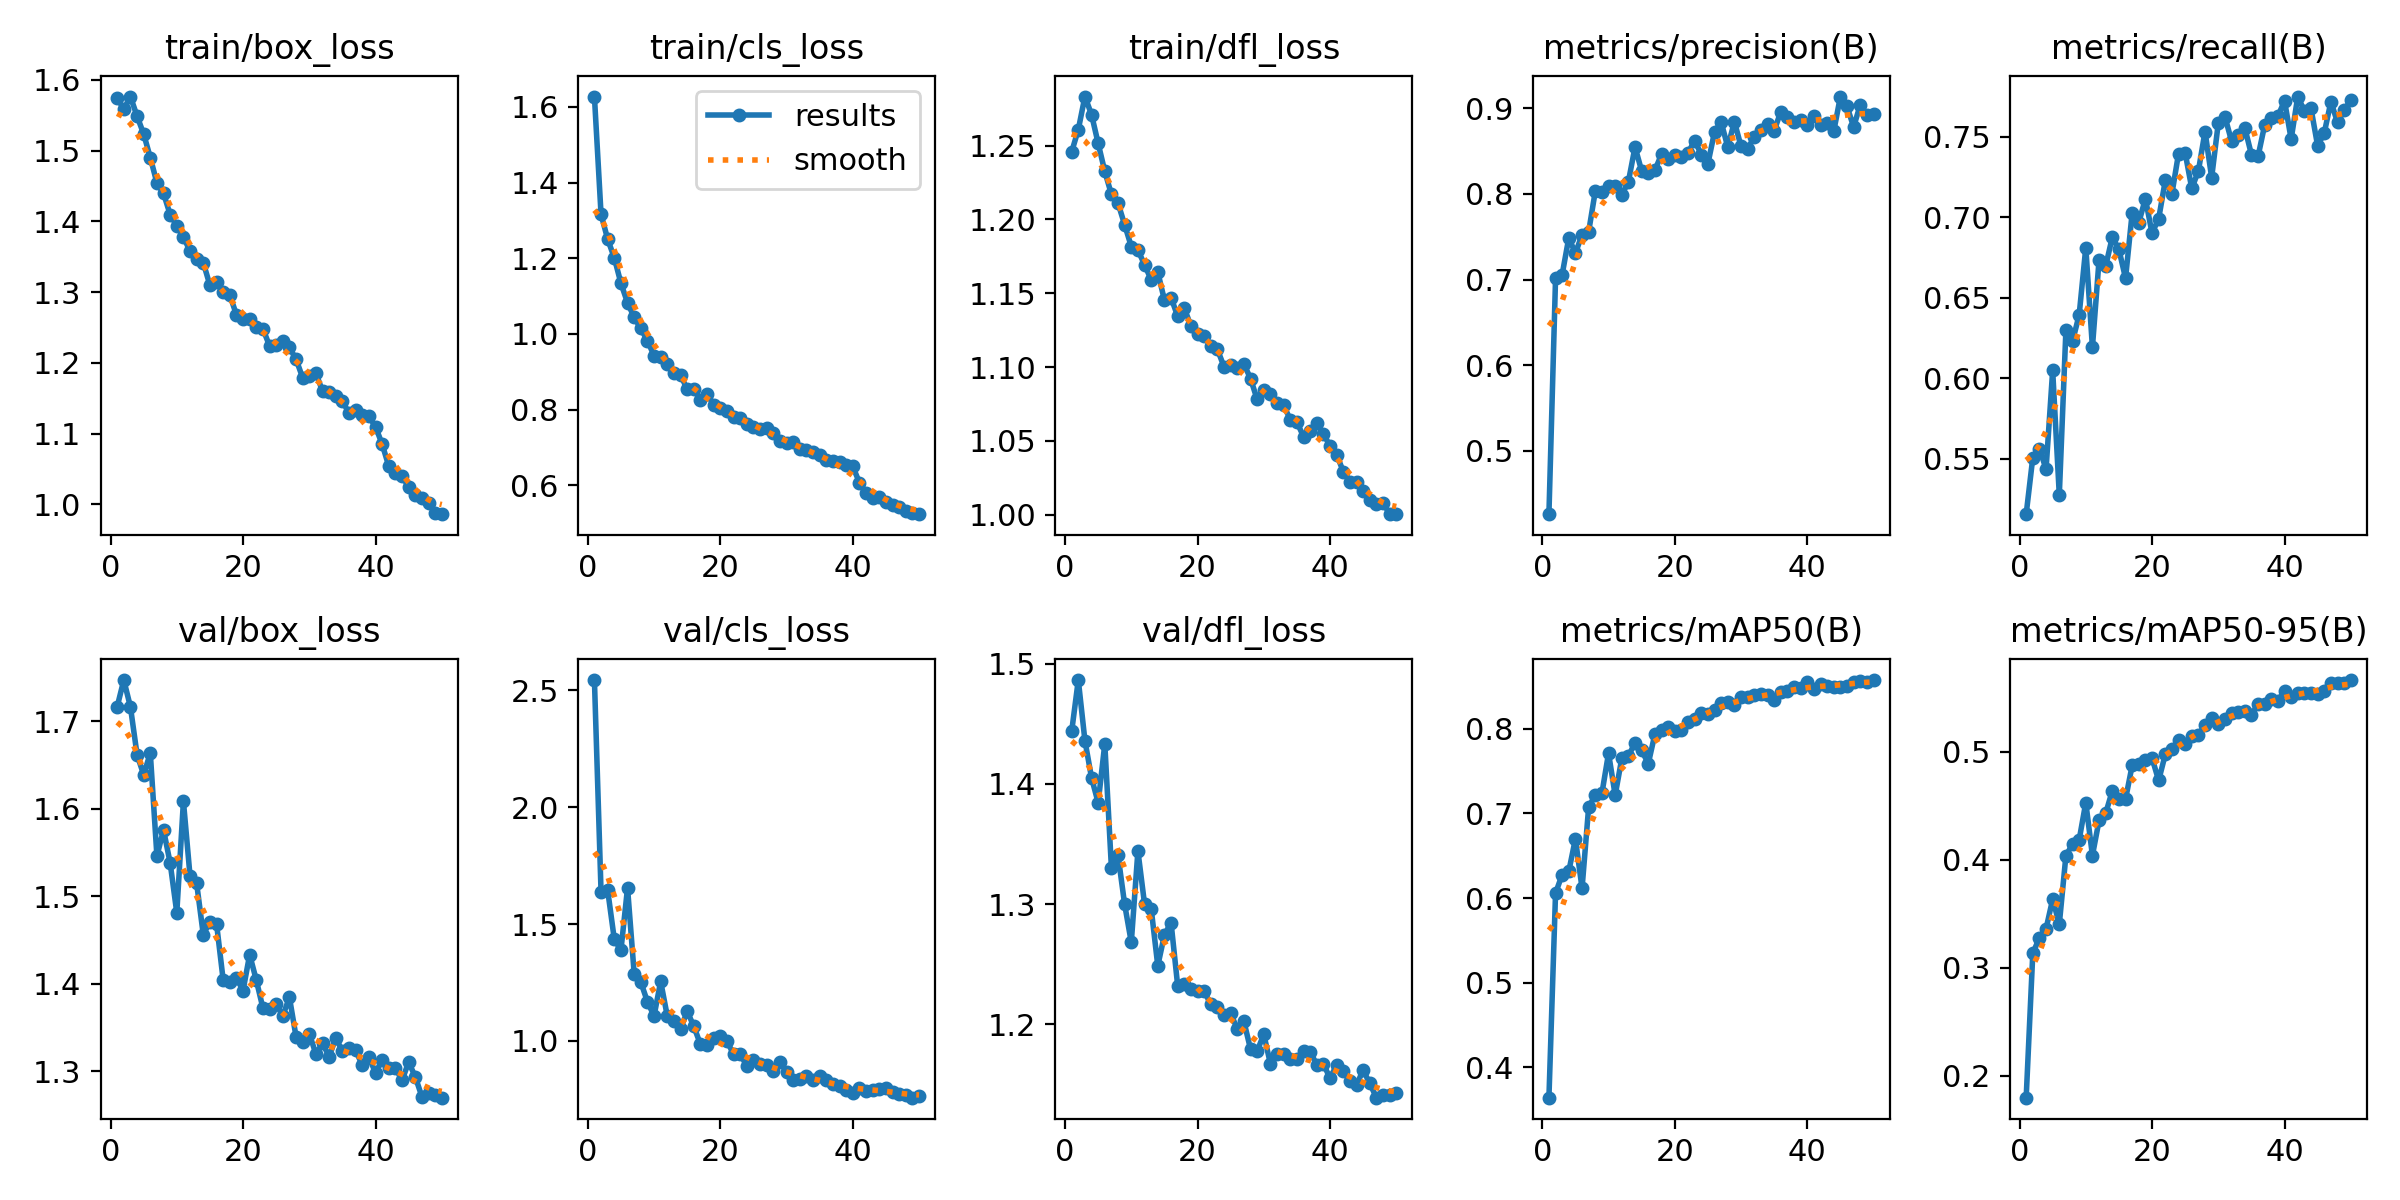

In [ ]:
from IPython.display import Image

Image(filename=f'/content/runs/detect/yolov8n_person_detection/results.png')

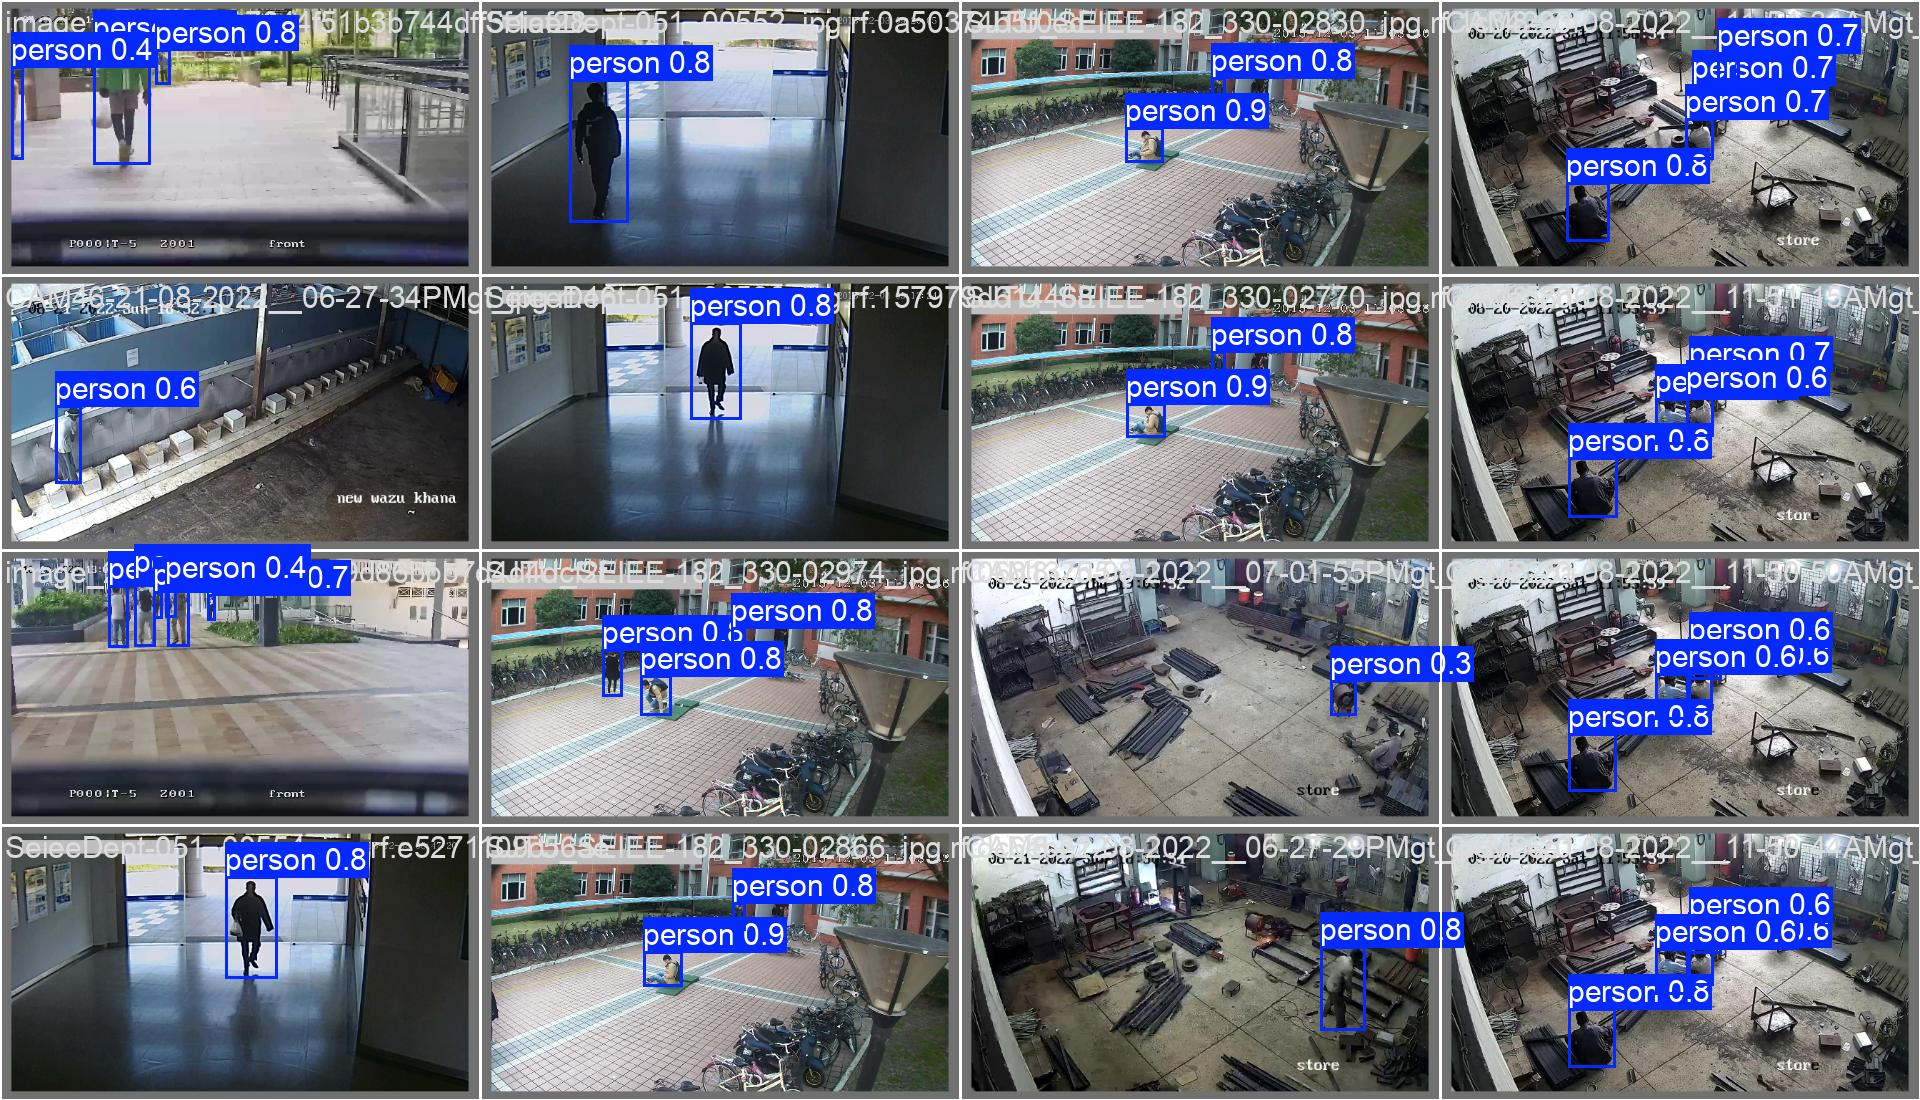

In [ ]:
Image(filename=f'/content/runs/detect/yolov8n_person_detection/val_batch2_pred.jpg')

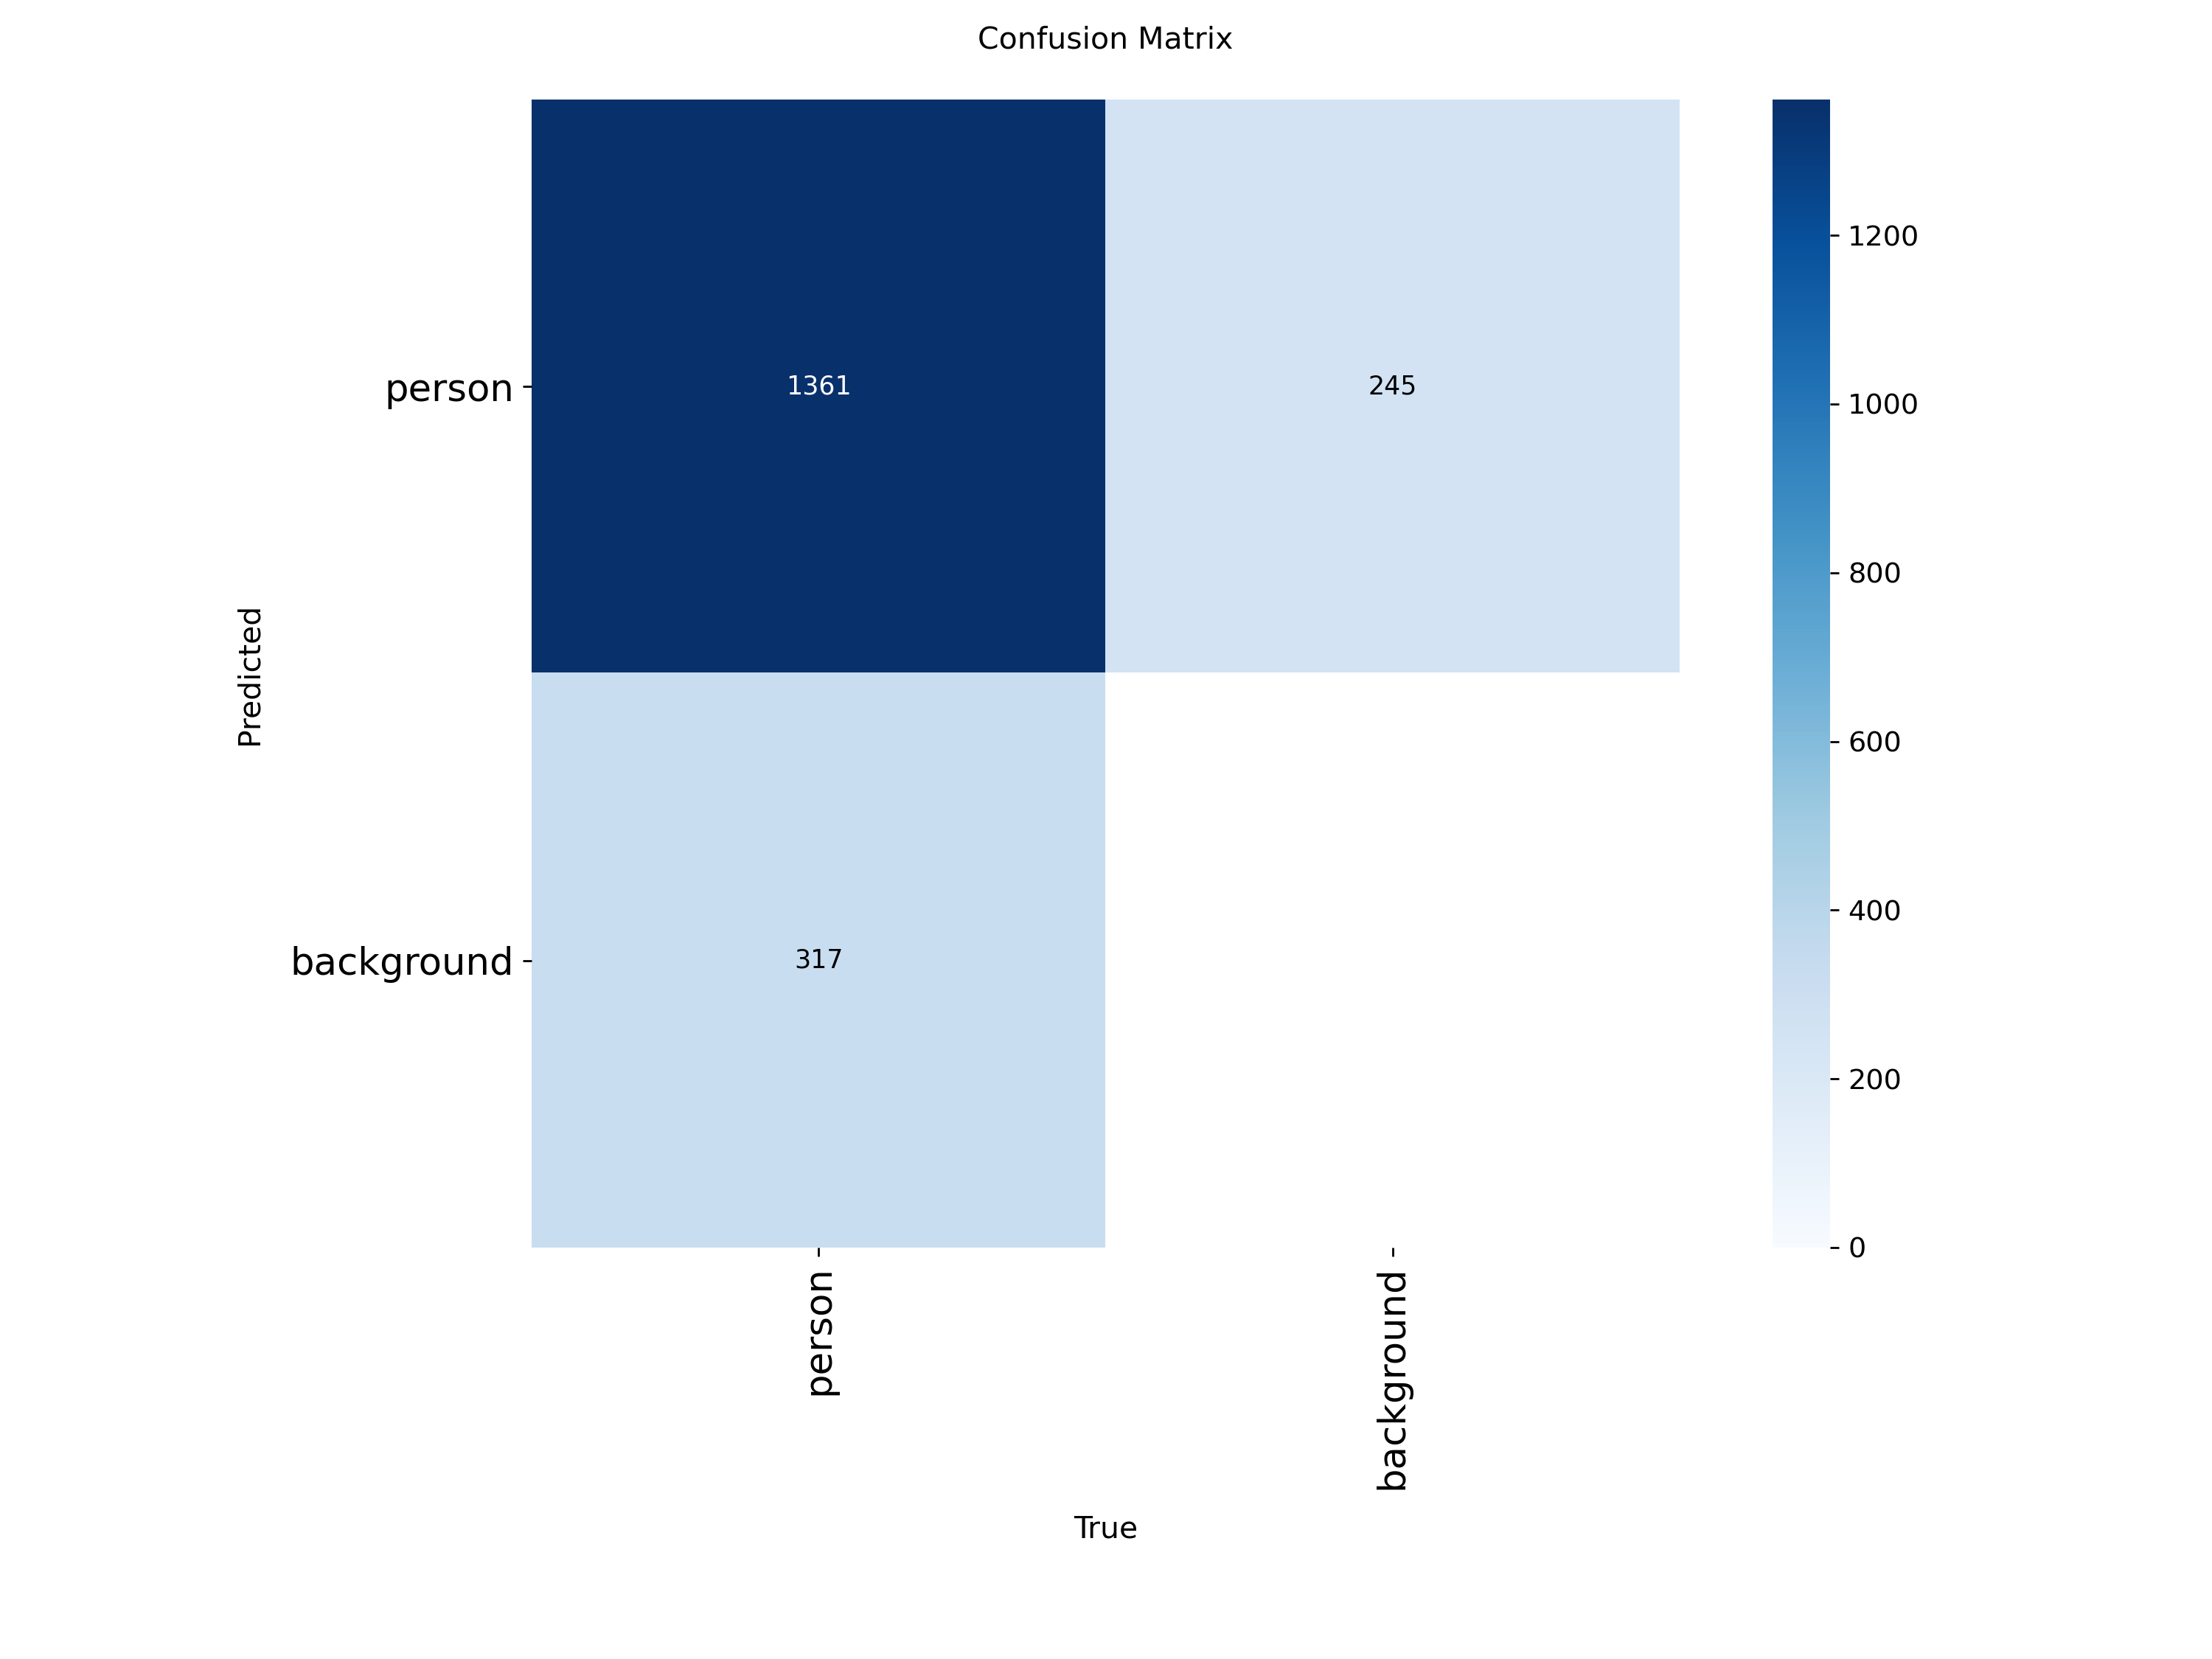

In [ ]:
Image(filename=f'/content/runs/detect/yolov8n_person_detection/confusion_matrix.png')


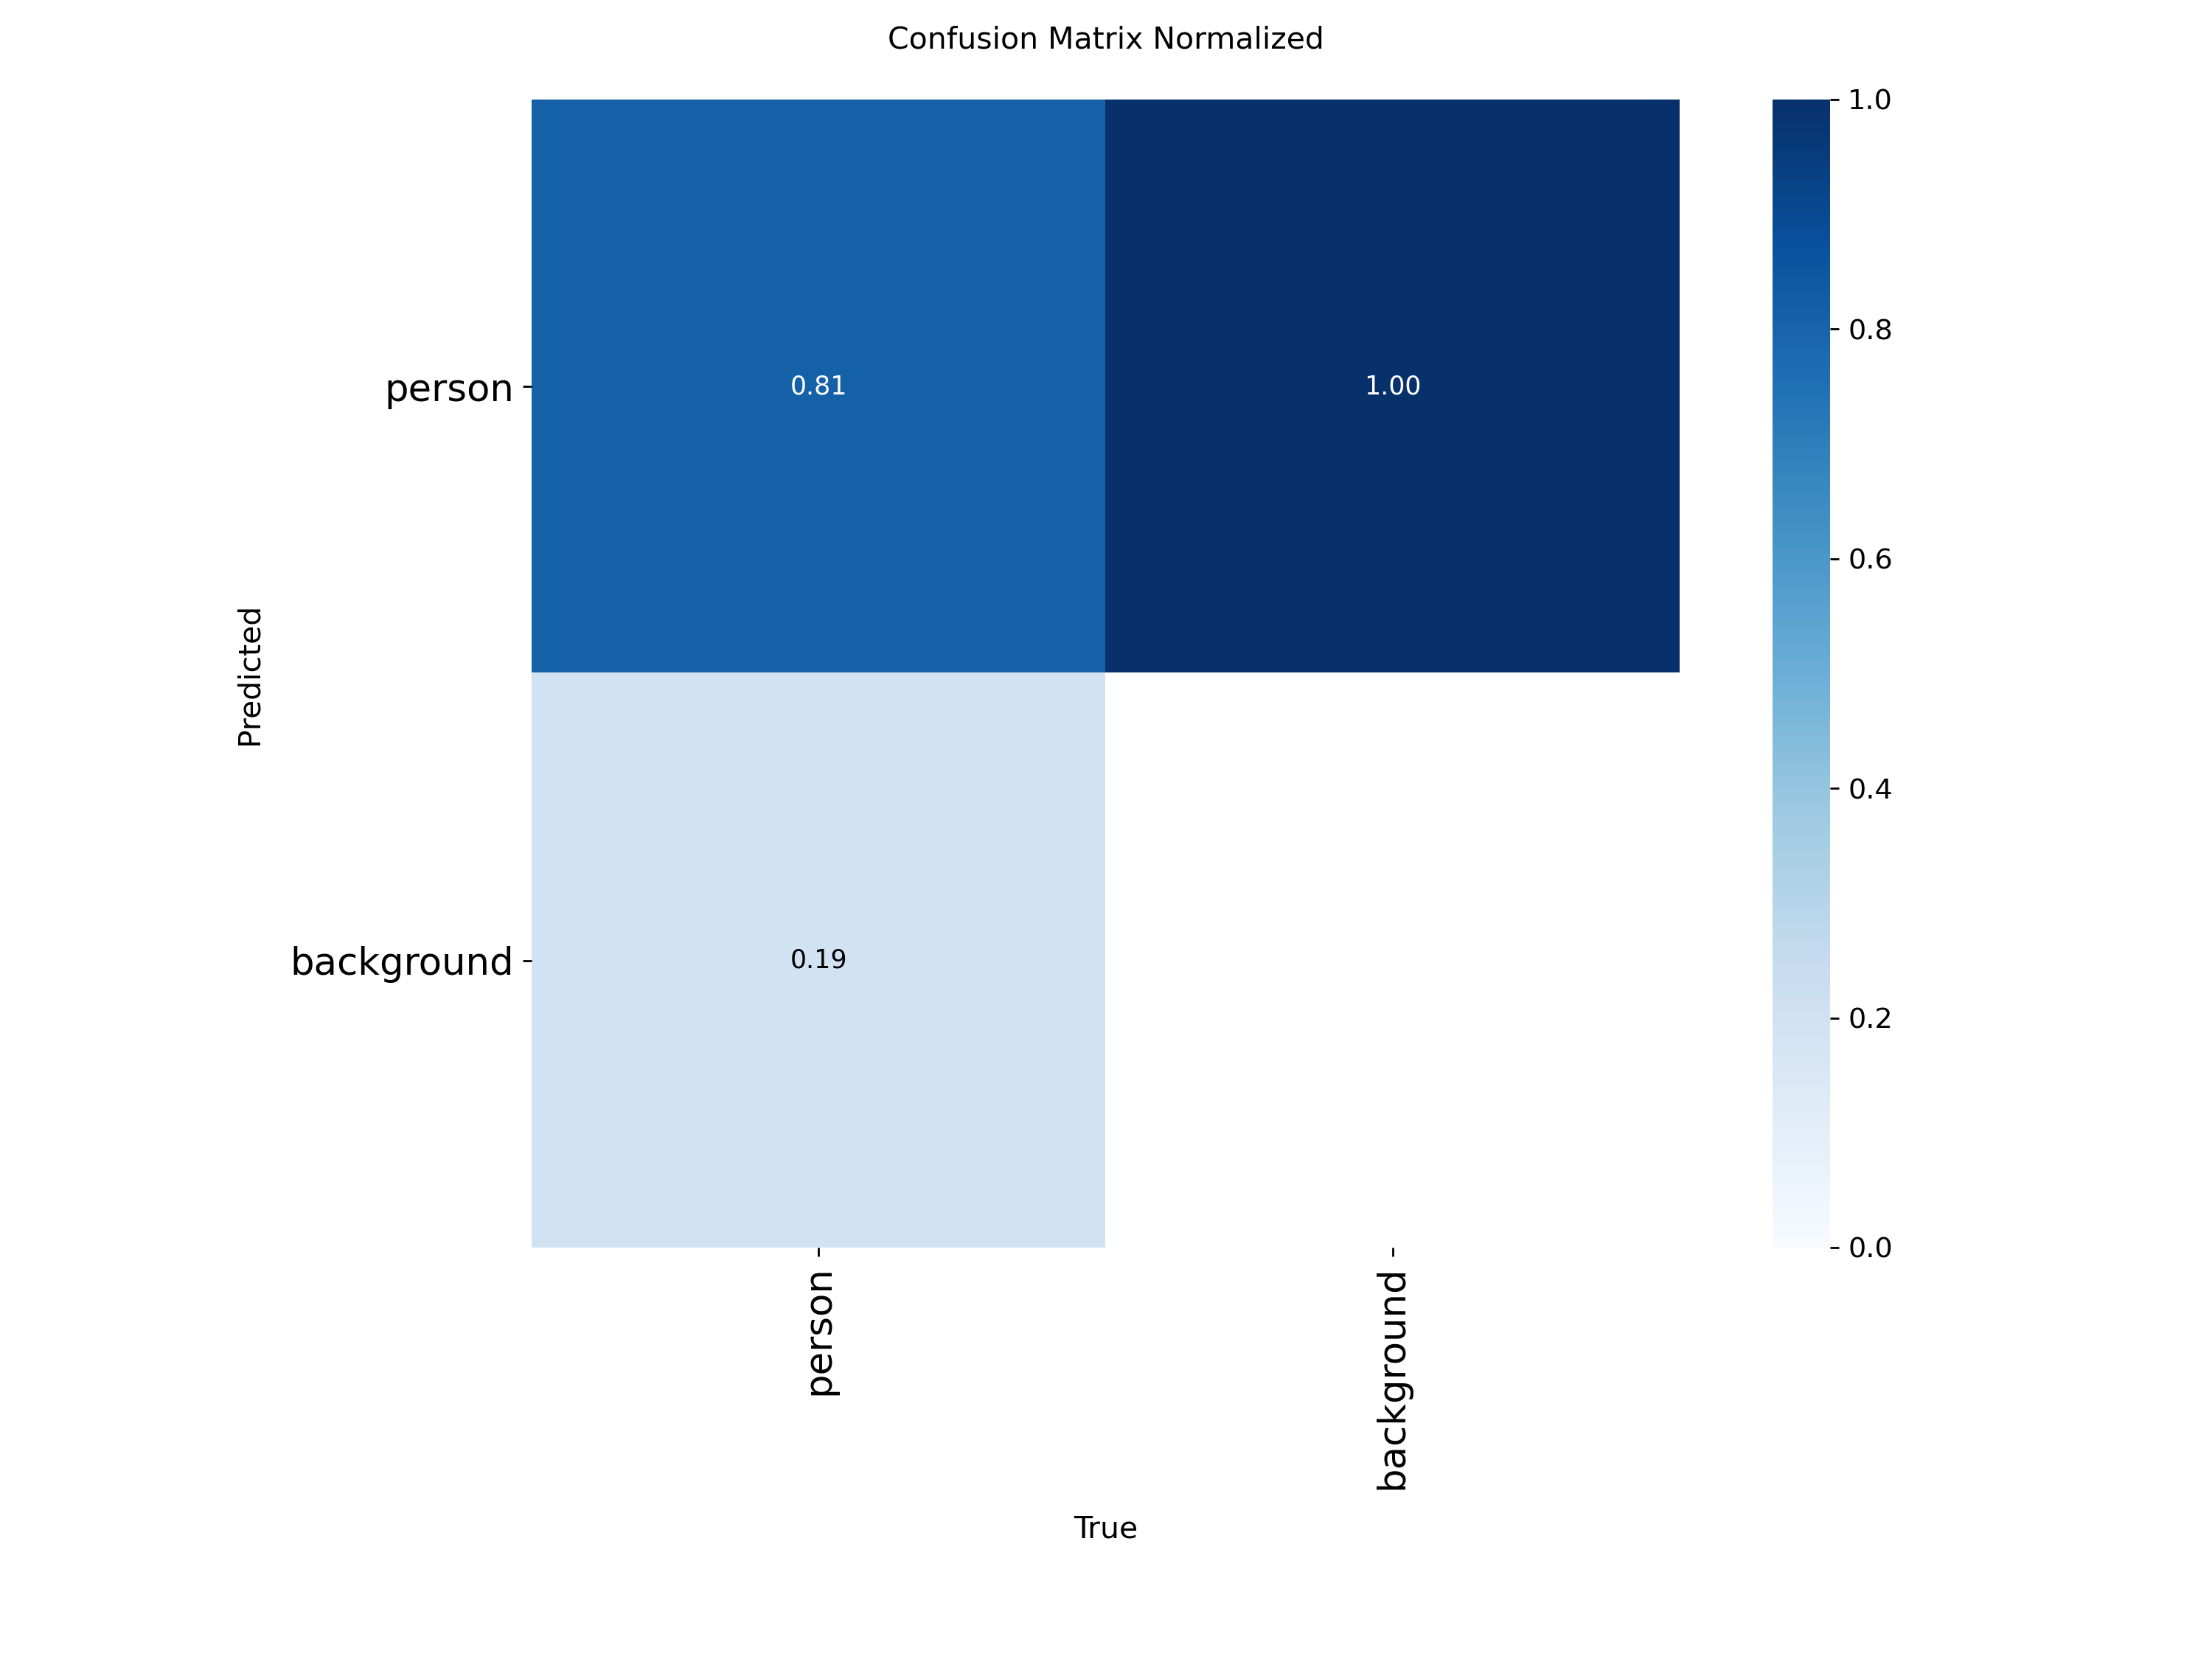

In [ ]:
Image(filename=f'/content/runs/detect/yolov8n_person_detection/confusion_matrix_normalized.png')


In [ ]:
model.export(format="onnx")

Ultralytics 8.3.216 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/yolov8n_person_detection/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 6.7s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.71...
ONNX: export success ✅ 7.9s, saved as '/content/runs/detect/yolov8n_person_detection/weights/best.onnx' (11.7 MB)

Export complete (8.4s)
Results saved to /content/runs/detect/yolov8n_person_detection/weights
Predict:         yolo predict task=detect mod

'/content/runs/detect/yolov8n_person_detection/weights/best.onnx'

In [ ]:
!zip -r /content/dataset.zip /content/tcc-1

A saída de streaming foi truncada nas últimas 5000 linhas.
  adding: content/tcc-1/train/labels/img970324134593_jpg.rf.9b5367c1834996cfb99dd48b10069e96.txt (deflated 37%)
  adding: content/tcc-1/train/labels/01-08-2022__12-44-39PM_jpg.rf.e30f75c60c30a07d23568aabb16683ad.txt (deflated 33%)
  adding: content/tcc-1/train/labels/image_49_jpg.rf.f7cc2302b7ef422bab0ace5ce0af7c54.txt (deflated 63%)
  adding: content/tcc-1/train/labels/01-08-2022__12-37-06PM_jpg.rf.3c1cea3c5596d0073e4c9fb849ad89e6.txt (deflated 40%)
  adding: content/tcc-1/train/labels/01-08-2022__03-29-17PM_jpg.rf.a1ea34e5722e90a3af4d1b4da31300e6.txt (deflated 56%)
  adding: content/tcc-1/train/labels/01-08-2022__11-19-21AM_jpg.rf.52baa05d7f2e34a6a4006ffe43e75dc1.txt (deflated 59%)
  adding: content/tcc-1/train/labels/image_860_jpg.rf.77b59d0eb9d20a777001bed5c522a62f.txt (deflated 65%)
  adding: content/tcc-1/train/labels/image_366_jpg.rf.2443bc1726c32e5b3f62ee1aedbaa471.txt (deflated 63%)
  adding: content/tcc-1/train/labels